## Main Question
1. **How does the amount of energy consumed influence the net greenhouse gas emissions of European countries?** 
2. **How is this influenced by the share of renewables in total energy?**

---

## Data Sources
This project utilizes three data sources from the European data portal [Eurostat](https://ec.europa.eu/eurostat/). Eurostat was chosen for this project because it provides high-quality, comparable data for all EU countries, not just individual nations. This consistency is crucial for a comprehensive analysis.

Eurostat's supra-national approach to data collection and publication is particularly advantageous for this project, as tackling climate change necessitates a broad, as-global-as-possible perspective. By examining data across 27 EU countries, the main question of 'how energy consumption influences greenhouse gas emissions' can be addressed in a more generalized manner.

Moreover, the significant variations in renewable energy usage across these countries allows for a robust analysis of the secondary question: 'how the correlation between energy consumption and greenhouse gas emissions is influenced by the share of renewables'. This comparative analysis across 27 countries enhances the generalizability of the findings.

### Discussion of the data source's structure and quality:
The data sources are similarly well-structured in a tabular form and explanations for which column has what meaning is provided via each source's metadata.
Of the five data quality dimensions, timeliness is not a concern, as the measurements span multiple years and represent fixed snapshots that will not change over time.

- **Datasource 1: Net greenhouse gas emissions**
  
  Describes the net greenhouse gas emissions for all countries in the EU either relative to 1990 or as tonnes per capita.

  **Data Quality:** The data appears to be of high quality and complete, with no missing cells, consistent formatting, and relevance to this project. However, there are some limitations: the accuracy cannot be easily verified, and some data cells are flagged as estimates or provisional.
- **Datasource 2: Primary energy consumption**

  Describes energy consumption of end users like households or industry and the energy consumption of the energy sector itself, accounting for energy transformation costs. The data is available for all countries of the EU. Data is measured either as million tonnes of oil equivalent, relative to 2005 or as tonnes of oil equivalent per capita.

  **Data Quality:** Data is missing for multiple countries and years, lowering the completeness of the dataset. For example, Switzerland has no recorded data on primary energy consumption, and several countries lack data for the year 2022. On the positive side, the formatting of the data is consistent, and the source is relevant to this project. However, as with Datasource 1, there are some limitations: the accuracy cannot be easily verified.
- **Datasource 3: Share of energy from renewable sources**

  The share of energy generated from renewable sources as declared by the EU. The data is available for all countries of the EU and is measured in percentages.

  **Data Quality:** The data appears to be of great quality, it is consistently formatted, has high relevance to the second question and is almost complete, only a few cells are missing for the countries Bosnia-and-Herzegovina and Georgia. As with Datasource 1 and 2, there are some limitations: the accuracy cannot be easily verified.

### Licenses
All data sources on Eurostat are subject to the same [copyright notice](https://ec.europa.eu/eurostat/about-us/policies/copyright), which states as follows:
> Eurostat has a policy of encouraging free re-use of its data, both for non-commercial and commercial purposes. All statistical data, metadata, content of web pages or other dissemination tools, official publications and other documents published on its website, with the exceptions listed below, can be reused without any payment or written licence provided that:
> - the source is indicated as Eurostat;
> - when re-use involves modifications to the data or text, this must be stated clearly to the end user of the information.

This grants the project the right to use any of Eurostat's data sources. In order to adhere to the obligations outlined in the copyright notice, the project will attribute Eurostat as the data's source and denote any modifications made to the data.

---

## Data Pipeline
The data pipeline is implemented as a Python script that utilizes the pandas and sqlalchemy libraries for data processing and storage.
It is structured in three main functions, each responsible for downloading, processing, and storing one of the three mentioned datasets from Eurostat into a SQLite database.  
Each function follows three steps:
1. **Data Acquisition:** The pipeline downloads CSV files from Eurostat using provided URLs.
2. **Data Processing:** Each dataset undergoes specific cleaning steps to filter out irrelevant rows and columns.
3. **Data Storage:** Cleaned datasets are then written into a SQLite database using sqlalchemy.

The pipeline provides informative print statements to indicate the progress and success of each stage.
### Transformation and Cleaning:
No data was transformed, but since the CSV files contain a lot of unnecessary information, it had to be removed:
- **Datasource 1: Net greenhouse gas emissions**:  
  This data source contains two data sheets, to which sheet a row belongs is indicated by the 'src_crf' column. The difference between the sheets is, what source sectors are considered for greenhouse gas emissions.  
  For this, 'Total (excluding memo items, including international aviation)' was chosen over 'Total (excluding memo items, including international aviation)' and all rows not belonging to the chosen sheet were removed.

  Furthermore, the data source provides sheets for two different units of measure, either a percentage based on the year 1990 being 100% or 'Tonnes per capita'. For the project, the latter was chosen and all other rows were removed.

  All columns except from the country, the year and the associated emissions were removed.
- **Datasource 2: Primary energy consumption**:  
  As with data source 1, this source contains different sheets. They differ in the unit of measure and for the project 'Tonnes of oil equivalent (TOE) per capita' was chosen and all other sheets were removed.

  Furthermore, all columns except from the country, the year and the associated energy consumption were removed.
- **Datasource 3: Share of energy from renewable sources**:  
  Like the previous data sources, this source contains different sheets. They differ in the granularity of data, e.g. one sheet for the share of renewable energy sources in transport. For this project, the most general sheet was chosen, which concerns the total share of renewable energy sources and all other sheets were removed.

  Furthermore, all columns except from the country, the year and the associated share of renewable energy sources were removed.
### Problems that came up:
No major problems arose, and it was straightforward to implement the pipeline.
### How the pipeline deals with errors and changing input data:
If Eurostat releases new input data with updated years or more countries, the pipeline should handle it correctly. However, if the structure of the CSV files changes, the pipeline will either fail with an error or produce incorrect output data.

The pipeline does not directly address errors but uses informative print statements to help pinpoint the source of an error for further debugging.

---

## Results and Limitations
### Output Data
The output of the data pipeline is a well-structured SQLite database containing three tables, one for each of the data sources. Each table shares the same three columns:
- **geo:** The two-letter country code.
- **TIME_PERIOD:** The year of the data snapshot.
- **OBS_VALUE:** The associated data value.
### Data Structure and Quality
The data structure of the resulting tables mirrors that of the input data, maintaining consistency and ease of access. The quality of the data in each resulting table reflects the quality of the original data sources. This means:
- The data is complete where the original data was complete.
- Any limitations, such as missing values or provisional estimates, are inherited from the source data.
### Choice of Data Format
A SQLite database was chosen for the output format because it allows for easy querying and data manipulation, making it convenient for further analysis.
### Critical Reflection and Potential Issues
While the data pipeline effectively consolidates the data into a usable format, there are several potential issues to consider:
1. **Data Quality:** Any inaccuracies, missing values, or provisional data in the source datasets are carried over into the output. This could affect the reliability of the analysis and should be carefully accounted for in the final report.
  Furthermore, since some countries miss data in some of the data sources, they can't easily be compared. For the final report, these countries may need to be excluded for consistency's sake.
2. **Data Structure:** The pipeline assumes a consistent structure in the input CSV files. If Eurostat changes the format or structure of these files in future updates, the pipeline may fail or produce incorrect results.
### Plots of the resulting data:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

db_path = '../../data/data.sqlite'
conn = sqlite3.connect(db_path)

#### Net greenhouse gas emissions

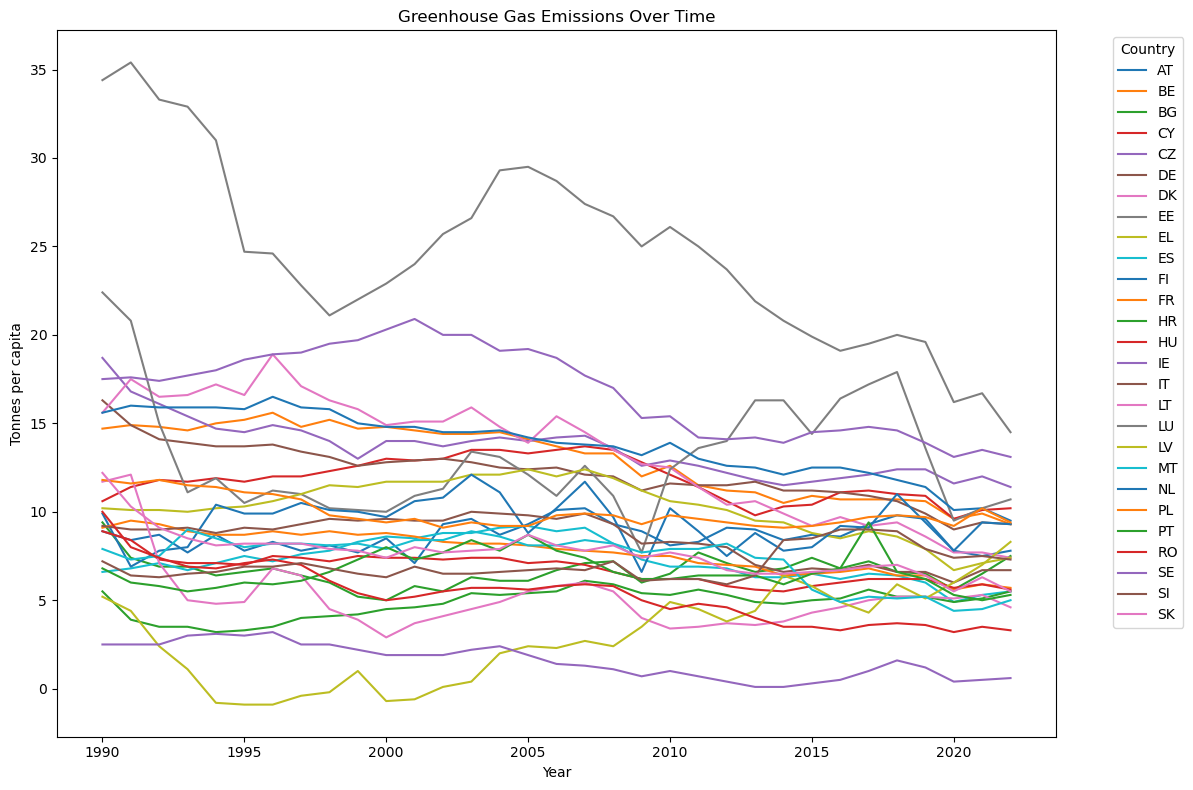

In [2]:
query = """
SELECT geo, TIME_PERIOD, OBS_VALUE
FROM emissions
"""
df = pd.read_sql(query, conn)

pivot_df = df.pivot(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

plt.figure(figsize=(12, 8))

for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.xlabel('Year')
plt.ylabel('Tonnes per capita')
plt.title('Greenhouse Gas Emissions Over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Primary Energy Consumption

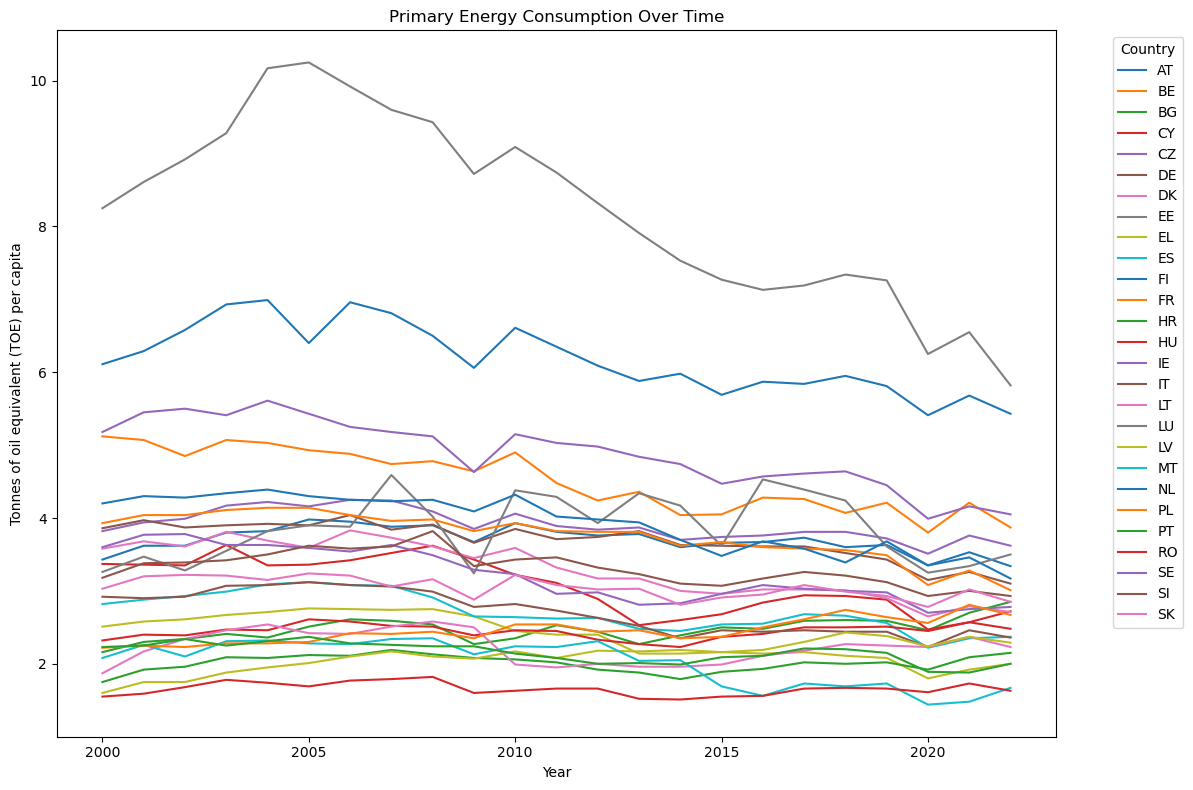

In [3]:
query = """
SELECT geo, TIME_PERIOD, OBS_VALUE
FROM energy_consumption
"""
df = pd.read_sql(query, conn)

pivot_df = df.pivot(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

plt.figure(figsize=(12, 8))

for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.xlabel('Year')
plt.ylabel('Tonnes of oil equivalent (TOE) per capita')
plt.title('Primary Energy Consumption Over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Share of energy from renewable sources

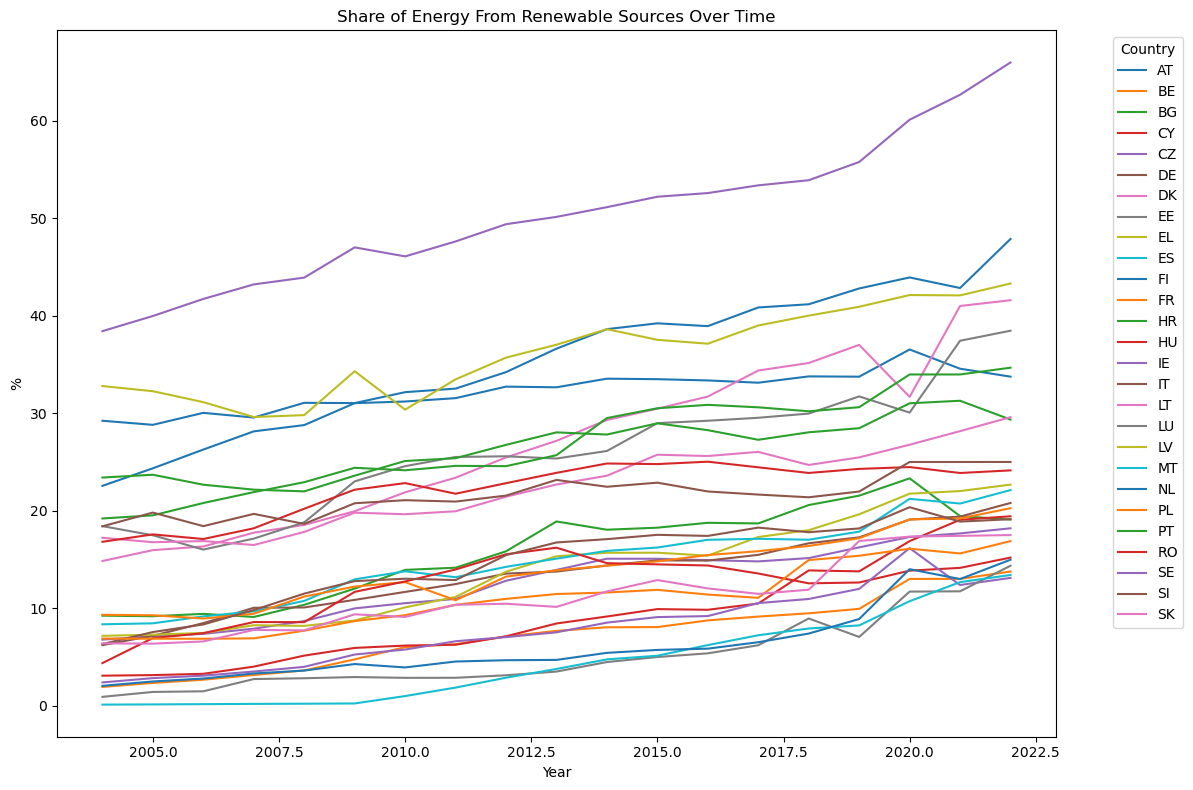

In [4]:
query = """
SELECT geo, TIME_PERIOD, OBS_VALUE
FROM energy_share
"""
df = pd.read_sql(query, conn)

pivot_df = df.pivot(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

plt.figure(figsize=(12, 8))

for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.xlabel('Year')
plt.ylabel('%')
plt.title('Share of Energy From Renewable Sources Over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [5]:
conn.close()